Per request from Shenshen on 02/24/2022, I need to make the following plot:

- plot the total extraction, n_Ag1+n_Ag2, as a function of the degree of specificity, quantified by |E_b1-E_b2|/(E_b1+E_b2), so that perfect cross-reactivity gives 0 and perfect specificity gives 1. 
- Pls make two plots, for F(t) and F(m_max), respectively. 
- In each plot, there are 4 curves, two for low affinity, well-mixed and segregated antigen, and the other two for high affinity; 
- use filled (open) symbols for high (low) affinity; black circle for well-mixed, and red diamond for segregated. 


This will show how Ag presentation and forcing dynamics influence selection of cross-reactive vs specific clones under different ranges of affinity.

Additional note:

-  By low vs high affinity, I referred to the value of E_b1+E_b2. For each curve, this value is fixed.

- Along the x-axis, to vary the level of specificity, |E_b1-E_b2|/(E_b1+E_b2), you want to keep E_b1+E_b2 fixed and tune the difference |E_b1-E_b2|

In [1]:
import sys
sys.path.insert(-1, "/home/jhongda/Research/Synapes/script")

In [4]:
import AgExtract.data as data
import AgExtract.utilities as utl
import matplotlib.pyplot as plt
from os import listdir
import numpy as np
from importlib import reload

In [233]:
#### load data
reload(data)

hillN5 = data.load_data(folder="output/a_hillN5/", fname=["base", "mc50", "mc60", "f0800", "f01000", "extended", "extended_lowAff"],
                        temp=False, data_name=["data.json", "data_3.json"])
hillN5_seg = data.load_data(folder="output/a_hillN5/", fname=["base_seg", "mc50_seg","mc60_seg",  "f0800_seg", "f01000_seg", "extended_seg", "extended_seg_lowAff"], temp=False, data_name=["data.json"])

hillN1 = data.load_data(folder="output/e_hillN1/", fname=["base", "mc50", "mc60"], temp=True, data_name=[])
hillN1_seg = data.load_data(folder="output/e_hillN1/", fname=["base_seg", "mc50_seg", "mc60_seg"], temp=True, data_name=[])

NstepF = data.load_data(folder="output/d_NstepF/", fname=["base", "f0800", "f01000", "extended"], temp=True, data_name=[])
NstepF_seg =  data.load_data(folder="output/d_NstepF/", fname=["base_seg", "f0800_seg", "f01000_seg", "extended_seg"], temp=True, data_name=[])

hillT5 = data.load_data(folder="output/b_hillT5/", fname=["base", "f0800", "f01000", "extended"], temp=True, data_name=[])
hillT5_seg = data.load_data(folder="output/b_hillT5/", fname=["base_seg", "f0800_seg", "f01000_seg", "extended_seg"], temp=True, data_name=[])


hillT1 = data.load_data(folder="output/j_hillT1/", fname=["extended"])
hillT1_seg = data.load_data(folder="output/j_hillT1/", fname=["extended_seg"])




l0100 = data.MyData()
l0100.load("output/a_hillN5/l0100/data.json")

output/a_hillN5/mc50/data_3.json not found!
output/a_hillN5/mc60/data_3.json not found!
output/a_hillN5/f0800/data_3.json not found!
output/a_hillN5/f01000/data_3.json not found!
output/a_hillN5/extended/data_3.json not found!
output/a_hillN5/extended_lowAff/data_3.json not found!


In [165]:
print("seg prm:", set(hillN5_seg[5].get("prms")))
print("mix prm:", set(hillN5[5].get("prms", False)))
print(np.sqrt(0.40**2 +  0.0495**2))
print(np.sqrt(0.141**2 +  0.244**2))

seg prm: {5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}
mix prm: {5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}
0.40305117541076596
0.281810219828877


In [185]:
# dd = hillN5[5]
# #dd = hillN5_seg[5]
# for i in range(len(dd.get("prms"))):
#     print(dd.get("prms")[i], ",",
#           dd.get("prms2")[i], ",", 
#           dd.get("nag")[i], ",",
#           dd.get("nag_antag")[i], ",",
#           #dd.get("nag_all")[i], ",",
#           hillN5[5].get("nstd")[i], ",",
#           hillN5[5].get("nstd_antag")[i], ",",
#           #hillN5[5].get("nag_antag_std")[i], ",",
#           ##np.sqrt(dd.get("nag_antag_std")[i]**2 + dd.get("nag_std")[i]**2)
#          )
    
# print(np.sqrt(0.141**2 +  0.244**2))

8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 

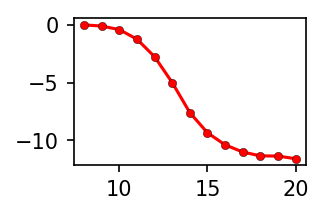

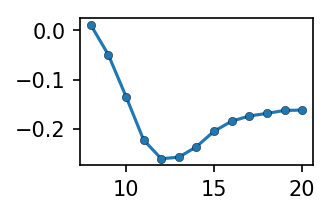

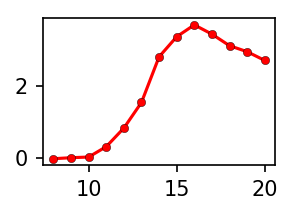

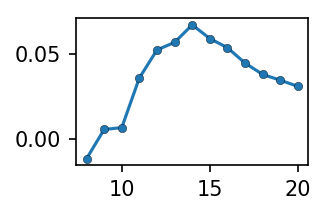

In [201]:
def make_diff_plot_1d(sci, sci_seg, prm0=10, ratio = False, **keyargs):
    prm1 = sci.get("prms", True)
    prm2 = sci.get("prms2", True)
    
    prm1_set = list(set(prm1))
    prm2_set = list(set(prm2))
    nag = sci.get("nag", True) + sci.get("nag_antag", True)
    
    
    prm_seg = sci_seg.get("prms", True)
    prm_seg_set = list(set(prm_seg))
    nag_seg = sci_seg.get("nag", True)
    
    ret1 = np.ones(len(prm1_set))*np.nan
    ret2 = np.ones(len(prm_seg_set))*np.nan
    for ni, p1i, p2i in zip(nag, prm1, prm2):
        if p1i<= p2i and p1i==prm0:
            print(p2i, end=", ")
            if ratio:
                ret1[prm1_set.index(p2i)] = ((nag_seg[prm_seg_set.index(p1i)] + nag_seg[prm_seg_set.index(p2i)])/2 - ni) / ((nag_seg[prm_seg_set.index(p1i)] + nag_seg[prm_seg_set.index(p2i)])/2 + ni)
                #ret2[prm_seg_set.index(p2i)] = (nag_seg[prm_seg_set.index(p1i)] + nag_seg[prm_seg_set.index(p2i)])/2
            else:
                ret1[prm1_set.index(p2i)] = ni
                ret2[prm_seg_set.index(p2i)] = (nag_seg[prm_seg_set.index(p1i)] + nag_seg[prm_seg_set.index(p2i)])/2
    fig, ax = plt.subplots(figsize=(2, 1.3), dpi=150)
    
    if not ratio:
        #plt.plot(prm_seg_set, ret2, '-ok', markeredgecolor='k', markeredgewidth=0.2, ms=4)
        plt.plot(prm2_set,  ret2- ret1, '-or', markeredgecolor='k', markeredgewidth=0.2, ms=4)
    
    if ratio:
        plt.plot(prm2_set,  ret1, '-oC0', markeredgecolor='k', markeredgewidth=0.2, ms=4)
    
    return ax
    
    
make_diff_plot_1d(hillN5[5], hillN5_seg[5], 8, False)
make_diff_plot_1d(hillN5[5], hillN5_seg[5], 8, True)

    
make_diff_plot_1d(hillT5[3], hillT5_seg[3], 8, False)
make_diff_plot_1d(hillT5[3], hillT5_seg[3], 8, True)


5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 

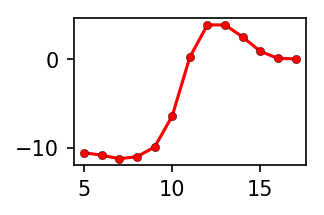

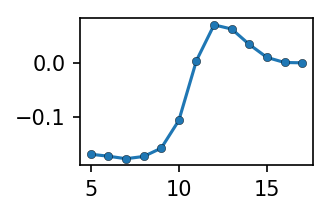

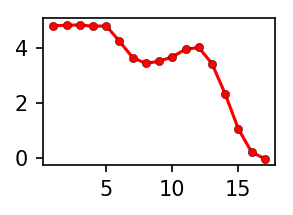

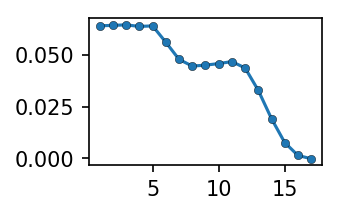

In [210]:
def make_diff_plot_1d(sci, sci_seg, prm0=10, ratio=True, **keyargs):
    prm1 = sci.get("prms", True)
    prm2 = sci.get("prms2", True)
    
    prm1_set = list(set(prm1))
    prm2_set = list(set(prm2))
    nag = sci.get("nag", True) + sci.get("nag_antag", True)
    
    
    prm_seg = sci_seg.get("prms", True)
    prm_seg_set = list(set(prm_seg))
    nag_seg = sci_seg.get("nag", True)
    
    ret1 = np.ones(len(prm1_set))*np.nan
    ret2 = np.ones(len(prm_seg_set))*np.nan
    for ni, p1i, p2i in zip(nag, prm1, prm2):
        if p1i<= p2i and p2i==prm0:
            print(p1i, end=", ")
            ret1[prm1_set.index(p1i)] = ni
            ret2[prm_seg_set.index(p1i)] = (nag_seg[prm_seg_set.index(p1i)] + nag_seg[prm_seg_set.index(p2i)])/2
    fig, ax = plt.subplots(figsize=(2, 1.3), dpi=150)
    
    if ratio:
        plt.plot(prm2_set,  (ret2 - ret1) / (ret2 + ret1), '-oC0', markeredgecolor='k', markeredgewidth=0.2, ms=4)
    else:
        #plt.plot(prm_seg_set, ret2, '-ok', markeredgecolor='k', markeredgewidth=0.2, ms=4)
        plt.plot(prm2_set,  ret2 - ret1, '-or', markeredgecolor='k', markeredgewidth=0.2, ms=4)
    
    return ax



make_diff_plot_1d(hillN5[5], hillN5_seg[5], 17, False)
make_diff_plot_1d(hillN5[5], hillN5_seg[5], 17, True)


make_diff_plot_1d(hillT5[3], hillT5_seg[3], 17, False)
make_diff_plot_1d(hillT5[3], hillT5_seg[3], 17, True)



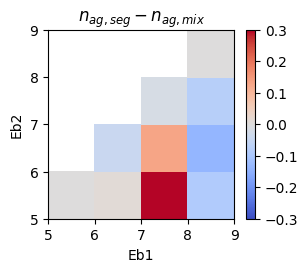

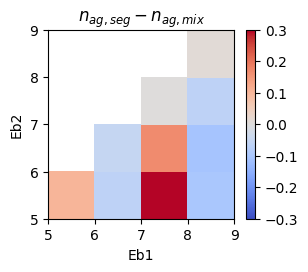

In [240]:

def make_diff_plot(sci, sci_seg,  output=False,ax=None, **keyargs):
    prm1 = sci.get("prms", True)
    prm2 = sci.get("prms2", True)
    
    prm1_set = list(set(prm1))
    prm2_set = list(set(prm2))
    
    if output:
        print("prm1=", prm1_set)
        print("prm2=", prm2_set)
    length = len(list(set(prm1)))
    nag = sci.get("nag", True) + sci.get("nag_antag", True)
    
    
    prm_seg = sci_seg.get("prms", True)
    prm_seg_set = list(set(prm_seg))
    
    if output:
        print("prm_seg_set", prm_seg_set)
    nag_seg = sci_seg.get("nag", True)
    
    ret = np.ones((len(prm1_set), len(prm2_set)))*np.nan
    for ni, p1i, p2i in zip(nag, prm1, prm2):
        if p1i<= p2i and p1i in prm_seg_set and p2i in prm_seg_set:
            ret[prm1_set.index(p1i), prm2_set.index(p2i)] = ((nag_seg[prm_seg_set.index(p1i)] + nag_seg[prm_seg_set.index(p2i)])/2 - ni)/((nag_seg[prm_seg_set.index(p1i)] + nag_seg[prm_seg_set.index(p2i)])/2 + ni)
    if ax is None:
        fig, ax=plt.subplots(figsize=(3,2.5), dpi=100)
    hmap = ax.pcolor(prm2_set, prm1_set,  ret, **keyargs)
    plt.xlabel("Eb1")
    plt.ylabel("Eb2")
    plt.title("$n_{ag, seg} - n_{ag, mix}$")
    plt.colorbar(hmap)
    #plt.show()
    return ax

ax = make_diff_plot(hillN5[6], hillN5_seg[6], cmap="coolwarm", vmin=-0.3, vmax = 0.3)
#ax.set(yticks=[10, 15, 20], xlim=(6, 20), ylim=(6, 20))
ax.set( xlim=(5, 9), ylim=(5, 9))
plt.show()


ax = make_diff_plot(hillN5[5], hillN5_seg[5], cmap="coolwarm", vmin=-0.3, vmax = 0.3)
#ax.set(yticks=[10, 15, 20], xlim=(6, 20), ylim=(6, 20))
ax.set( xlim=(5, 9), ylim=(5, 9))
plt.show()

# ax = make_diff_plot(hillT5[3], hillT5_seg[3], cmap="coolwarm", vmin=-5, vmax=5)
# ax.set(yticks=[10, 15, 20], xlim=(6, 20), ylim=(6, 20))


In [231]:
hillN5_seg[6].dataset

{'prms': [],
 'prms2': [],
 'tr': [],
 'tr_std': [],
 'tstd': [],
 'tstd_std': [],
 'fr': [],
 'fr_std': [],
 'fstd': [],
 'fstd_std': [],
 'tr_all': [],
 'tr_all_std': [],
 'nag': [],
 'nag_std': [],
 'nstd': [],
 'nstd_std': [],
 'nag_antag': [],
 'nag_antag_std': [],
 'nstd_antag': [],
 'nstd_antag_std': [],
 'nag_all': [],
 'nag_all_std': [],
 'm2max': [],
 'm2max_std': [],
 'm2mstd': [],
 'm2mstd_std': [],
 'm1max': [],
 'm1max_std': [],
 'm1mstd': [],
 'm1mstd_std': [],
 'mmax': [],
 'mmax_std': [],
 'mmstd': [],
 'mmstd_std': [],
 'm2max_all': [],
 'm2max_all_std': [],
 'tr_most_prob': [],
 'tr_most_prob_std': [],
 'tr_median': [],
 'tr_median_std': [],
 'nag1': [],
 'nag1_std': [],
 'nag2': [],
 'nag2_std': [],
 'nstd1': [],
 'nstd1_std': [],
 'nstd2': [],
 'nstd2_std': [],
 'nag3': [],
 'nag3_std': [],
 'nag4': [],
 'nag4_std': [],
 'nstd3': [],
 'nstd3_std': [],
 'nstd4': [],
 'nstd4_std': [],
 'eb_sens': [],
 'eb_sens_std': [],
 'l0_sens': [],
 'l0_sens_std': [],
 'eb_acc': 

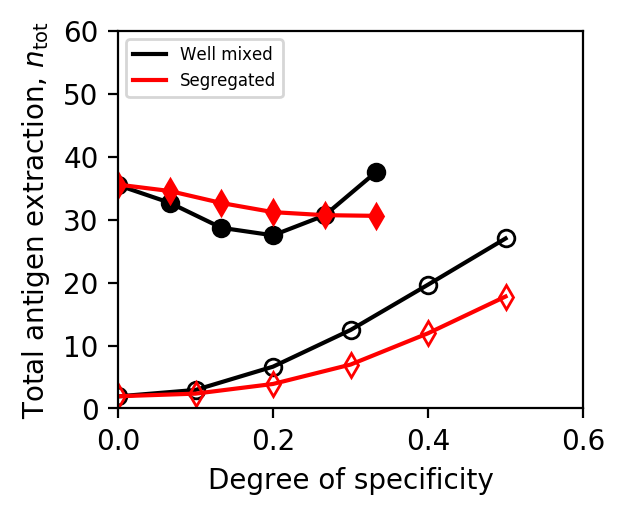

In [74]:
def extractData(sci, etot=20, seg=False):
    plotting_data = {
            "specificity": [],
            "nag_tot": []
        }
    prm1 = sci.get("prms", False)
    nag = sci.get("nag", True)
    if seg:
        
        for i in range(len(prm1)):
            if etot - prm1[i] in prm1 and prm1[i] >= etot - prm1[i]:
                if (prm1[i] - (etot - prm1[i])) / etot <= 0.55:
                    plotting_data["specificity"].append((prm1[i] - (etot - prm1[i])) / etot)
                    plotting_data["nag_tot"].append( (nag[i] + nag[prm1.index(etot-prm1[i])])/2 )
        
    else:
        prm2 = sci.get("prms2")
        nag_antag = sci.get("nag_antag", True)
        for i in range(len(prm1)):
            if prm1[i] + prm2[i] == etot and prm1[i] >= prm2[i]:
                if (prm1[i] - prm2[i]) / etot <= 0.55:
                    plotting_data["specificity"].append((prm1[i] - prm2[i]) / etot)
                    plotting_data["nag_tot"].append(nag[i] + nag_antag[i])
    return plotting_data



fig, ax = plt.subplots(figsize=(3, 2.5), dpi=200)

plt.plot([-1, -0.5], [10, 20], '-k')
plt.plot([-1, -0.5], [10, 20], '-r')
### low affinity 20, open symbol
extracted_hillN5_data = extractData(hillN5[5], seg=False)
extracted_hillN5_seg_data = extractData(hillN5_seg[5], seg=True)
### well-mixed
plt.plot(extracted_hillN5_data["specificity"], extracted_hillN5_data["nag_tot"], '-ok', fillstyle="none")
### separated
plt.plot(extracted_hillN5_seg_data["specificity"], extracted_hillN5_seg_data["nag_tot"], '-dr', fillstyle="none")



### high affinity 30, filled symbol
extracted_hillN5_data_high_aff = extractData(hillN5[5], etot=30, seg=False)
extracted_hillN5_seg_data_high_aff = extractData(hillN5_seg[5], etot=30, seg=True)
plt.plot(extracted_hillN5_data_high_aff["specificity"], extracted_hillN5_data_high_aff["nag_tot"], '-ok')
plt.plot(extracted_hillN5_seg_data_high_aff["specificity"], extracted_hillN5_seg_data_high_aff["nag_tot"], '-dr')

plt.ylim(0, 60)
plt.xlim(0, 0.6)

plt.legend(["Well mixed", "Segregated"], 
           fontsize=6, ncol=1, loc=2)


plt.xlabel("Degree of specificity")
plt.ylabel(r"Total antigen extraction, $n_{\rm tot}$")
plt.show()

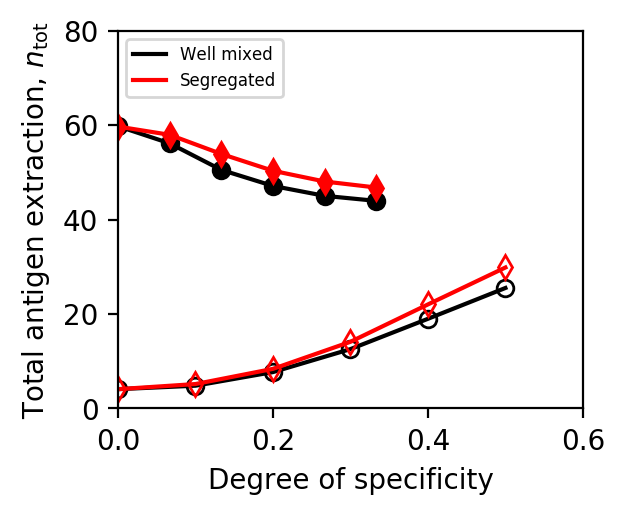

In [75]:

fig, ax = plt.subplots(figsize=(3, 2.5), dpi=200)
plt.plot([-1, -0.5], [10, 20], '-k')
plt.plot([-1, -0.5], [10, 20], '-r')


### low affinity 20, filled symbol
extracted_hillT5_data = extractData(hillT5[3], seg=False)
extracted_hillT5_seg_data = extractData(hillT5_seg[3], seg=True)
### well-mixed
plt.plot(extracted_hillT5_data["specificity"], extracted_hillT5_data["nag_tot"], '-ok', fillstyle="none")
### separated
plt.plot(extracted_hillT5_seg_data["specificity"], extracted_hillT5_seg_data["nag_tot"], '-dr', fillstyle="none")



### high affinity 30, open symbol
extracted_hillT5_data_high_aff = extractData(hillT5[3], etot=30, seg=False)
extracted_hillT5_seg_data_high_aff = extractData(hillT5_seg[3], etot=30, seg=True)
plt.plot(extracted_hillT5_data_high_aff["specificity"], extracted_hillT5_data_high_aff["nag_tot"], '-ok')
plt.plot(extracted_hillT5_seg_data_high_aff["specificity"], extracted_hillT5_seg_data_high_aff["nag_tot"], '-dr')

plt.ylim(0, 80)
plt.xlim(0, 0.6)

plt.legend(["Well mixed", "Segregated"], 
           fontsize=6, ncol=1, loc=2)

plt.xlabel("Degree of specificity")
plt.ylabel(r"Total antigen extraction, $n_{\rm tot}$")
plt.show()

In [215]:
#### load data
reload(data)

hillN5_Etot30 = data.load_data(folder="output/k_hillN5_diagonal/", fname=["Etot30"], temp=False, data_name=["data_3.14.json"])
hillN5_Etot25 = data.load_data(folder="output/k_hillN5_diagonal/", fname=["Etot25"], temp=False, data_name = ["data.json"])
hillN5_Etot20 = data.load_data(folder="output/k_hillN5_diagonal/", fname=["Etot20"], temp=False, data_name = ["data_3.json"])
hillN5_seg = data.load_data(folder="output/k_hillN5_diagonal/", fname=["seg"], temp=False, data_name=["data_3.1.json"])


hillT5_Etot30 = data.load_data(folder="output/l_hillT5_diagonal/", fname=["Etot30"], temp=False, data_name=["data_3.json"])
hillT5_Etot25 = data.load_data(folder="output/l_hillT5_diagonal/", fname=["Etot25"], temp=False, data_name=["data.json"])

hillT5_Etot20 = data.load_data(folder="output/l_hillT5_diagonal/", fname=["Etot20"], temp=False, data_name = ["data.json"])
hillT5_seg = data.load_data(folder="output/l_hillT5_diagonal/", fname=["seg"], temp=False, data_name=["data.json"])






[0.08322059040085371, 0.09924156835161815, 0.1277101753537629, 0.199448963118109, 0.3360196340162945, 0.3136629471972175, 0.3521629988766249, 0.4809572341810769, 0.5704100620508796, 0.5757992271616913, 0.5648479638116993]


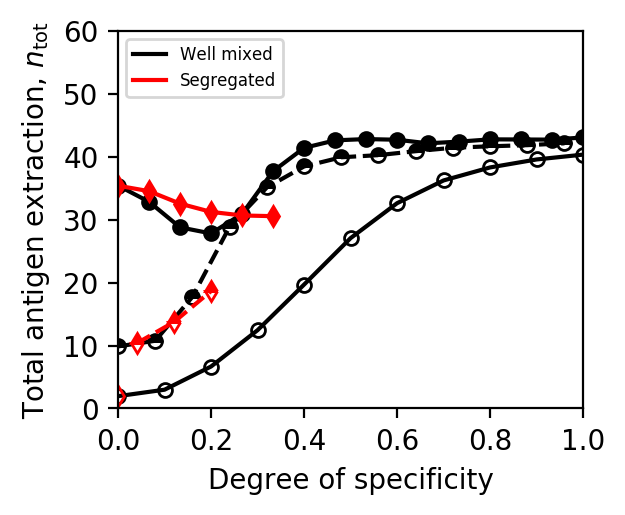

In [213]:
def extractData(sci, etot=20, seg=False):
    plotting_data = {
            "specificity": [],
            "nag_tot": [],
            "nag_tot_std": []
        }
    prm1 = sci.get("prms", False)
    nag = sci.get("nag", True)
    nag_std = sci.get("nag_std", True)
    if seg:
        
        for i in range(len(prm1)):
            if etot - prm1[i] in prm1 and prm1[i] >= etot - prm1[i]:
                plotting_data["specificity"].append((prm1[i] - (etot - prm1[i])) / etot)
                plotting_data["nag_tot"].append( (nag[i] + nag[prm1.index(etot-prm1[i])])/2 )
                plotting_data["nag_tot_std"].append( np.sqrt(nag_std[i]**2 + nag_std[prm1.index(etot-prm1[i])]**2))
        
    else:
        nag_antag = sci.get("nag_antag", True)
        ntot_std = sci.get("ntot_std", True)
        for i in range(len(prm1)-1, -1, -1):
            prm2i = etot - prm1[i]
            if prm1[i] >  prm2i:
                continue
            plotting_data["specificity"].append(-(prm1[i] - prm2i) / etot)
            plotting_data["nag_tot"].append(nag[i] + nag_antag[i])
            plotting_data["nag_tot_std"].append( ntot_std[i])

    return plotting_data



fig, ax = plt.subplots(figsize=(3, 2.5), dpi=200)

plt.plot([-1, -0.5], [10, 20], '-k')
plt.plot([-1, -0.5], [10, 20], '-r')
### low affinity 20, open symbol
extracted_hillN5_data = extractData(hillN5_Etot20[0], seg=False)
extracted_hillN5_seg_data = extractData(hillN5_seg[0], seg=True)
### well-mixed
print(extracted_hillN5_data["nag_tot_std"])
plt.plot(extracted_hillN5_data["specificity"], extracted_hillN5_data["nag_tot"], '-ok', fillstyle="none", ms=5)
#plt.errorbar(extracted_hillN5_data["specificity"], extracted_hillN5_data["nag_tot"], yerr = extracted_hillN5_data["nag_tot_std"], color="g", alpha=1)
### separated
plt.plot(extracted_hillN5_seg_data["specificity"], extracted_hillN5_seg_data["nag_tot"], '-dr', fillstyle="none", ms=5)


### middle affinity 25, halffilled symbol
extracted_hillN5_data_high_aff = extractData(hillN5_Etot25[0], etot=25, seg=False)
extracted_hillN5_seg_data_high_aff = extractData(hillN5_seg[0], etot=25, seg=True)
plt.plot(extracted_hillN5_data_high_aff["specificity"], extracted_hillN5_data_high_aff["nag_tot"], '--ok', fillstyle="top", ms=5)
plt.plot(extracted_hillN5_seg_data_high_aff["specificity"], extracted_hillN5_seg_data_high_aff["nag_tot"], '--dr', fillstyle="top", ms=5)




### high affinity 30, filled symbol
extracted_hillN5_data_high_aff = extractData(hillN5_Etot30[0], etot=30, seg=False)
extracted_hillN5_seg_data_high_aff = extractData(hillN5_seg[0], etot=30, seg=True)
plt.plot(extracted_hillN5_data_high_aff["specificity"], extracted_hillN5_data_high_aff["nag_tot"], '-ok', ms=5)
plt.plot(extracted_hillN5_seg_data_high_aff["specificity"], extracted_hillN5_seg_data_high_aff["nag_tot"], '-dr', ms=5)

plt.ylim(0, 60)
plt.xlim(0, 1)

plt.legend(["Well mixed", "Segregated"], 
           fontsize=6, ncol=1, loc=2)


plt.xlabel("Degree of specificity")
plt.ylabel(r"Total antigen extraction, $n_{\rm tot}$")
plt.show()

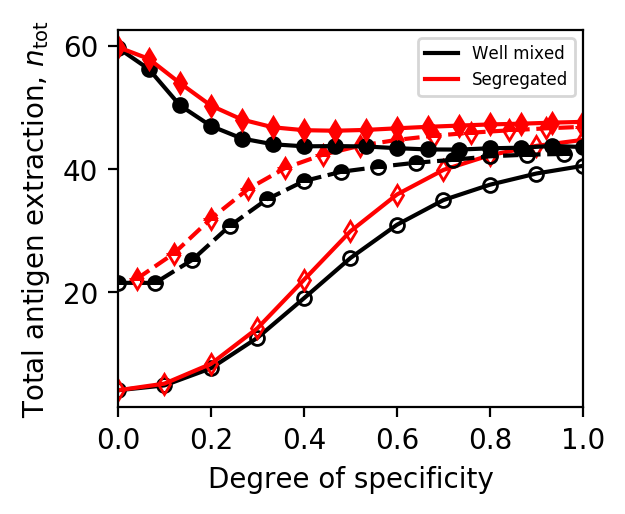

In [184]:

fig, ax = plt.subplots(figsize=(3, 2.5), dpi=200)
plt.plot([-1, -0.5], [10, 20], '-k')
plt.plot([-1, -0.5], [10, 20], '-r')


### low affinity 20, filled symbol
extracted_hillT5_data = extractData(hillT5_Etot20[0], seg=False)
extracted_hillT5_seg_data = extractData(hillT5_seg[0], seg=True)
### well-mixed
plt.plot(extracted_hillT5_data["specificity"], extracted_hillT5_data["nag_tot"], '-ok', fillstyle="none", ms=5)
### separated
plt.plot(extracted_hillT5_seg_data["specificity"], extracted_hillT5_seg_data["nag_tot"], '-dr', fillstyle="none", ms=5)


### low affinity 20, filled symbol
extracted_hillT5_data = extractData(hillT5_Etot25[0], etot=25, seg=False)
extracted_hillT5_seg_data = extractData(hillT5_seg[0], etot=25, seg=True)
### well-mixed
plt.plot(extracted_hillT5_data["specificity"], extracted_hillT5_data["nag_tot"], '--ok', fillstyle="top", ms=5)
### separated
plt.plot(extracted_hillT5_seg_data["specificity"], extracted_hillT5_seg_data["nag_tot"], '--dr', fillstyle="top", ms=5)





### high affinity 30, open symbol
extracted_hillT5_data_high_aff = extractData(hillT5_Etot30[0], etot=30, seg=False)
extracted_hillT5_seg_data_high_aff = extractData(hillT5_seg[0], etot=30, seg=True)
plt.plot(extracted_hillT5_data_high_aff["specificity"], extracted_hillT5_data_high_aff["nag_tot"], '-ok', ms=5)
plt.plot(extracted_hillT5_seg_data_high_aff["specificity"], extracted_hillT5_seg_data_high_aff["nag_tot"], '-dr', ms=5)

# plt.ylim(0, 80)
plt.xlim(0, 1)

plt.legend(["Well mixed", "Segregated"], 
           fontsize=6, ncol=1, loc=0)

plt.xlabel("Degree of specificity")
plt.ylabel(r"Total antigen extraction, $n_{\rm tot}$")
plt.show()

In [84]:
hillT5_Etot30[0].dataset

{'prms': [0, 2, 4, 6, 8, 10, 12, 14],
 'prms2': [],
 'tr': [0.984532967489806,
  0.9878954735055927,
  0.9897325239193971,
  1.0031349742891065,
  1.0309462124312165,
  1.0531326868332611,
  1.1829281090865948,
  1.3594183880048192],
 'tr_std': [0.008238012965874555,
  0.013269751742173666,
  0.011909012696453213,
  0.009168690003967247,
  0.0027628431544568345,
  0.0029839398582235835,
  0.003369043880640905,
  0.003661837264580282],
 'tstd': [0.213573919376899,
  0.20567801014831755,
  0.20404758965253386,
  0.16798396217798944,
  0.06302618550860214,
  0.044368932084590015,
  0.05416980395782913,
  0.07675597206954952],
 'tstd_std': [0.021280943281639774,
  0.028782224844629493,
  0.026997846375652702,
  0.026544558453765483,
  0.015315673855683552,
  0.006481216822955032,
  0.007762774472955093,
  0.0040795130892827495],
 'fr': [310.85633333333334,
  312.28666666666663,
  313.0223333333333,
  317.43333333333334,
  327.27433333333335,
  341.78766666666667,
  420.3366666666667,
  493

In [108]:
extracted_hillT5_data_high_aff

{'specificity': [0.06666666666666667,
  0.2,
  0.3333333333333333,
  0.4666666666666667,
  0.6,
  0.7333333333333333,
  0.8666666666666667,
  1.0,
  0.06666666666666667,
  0.2,
  0.3333333333333333,
  0.4666666666666667,
  0.6,
  0.7333333333333333,
  0.8666666666666667,
  1.0],
 'nag_tot': [56.182,
  46.99166666666666,
  44.082166666666666,
  43.82749999999999,
  43.326,
  43.224333333333334,
  43.5295,
  43.6605,
  56.182,
  46.99166666666666,
  44.082166666666666,
  43.82749999999999,
  43.326,
  43.224333333333334,
  43.5295,
  43.6605]}

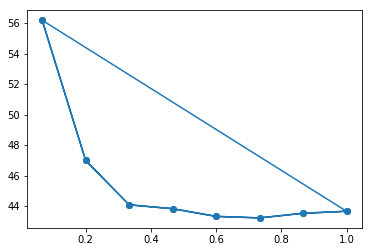

In [112]:
plt.plot(extracted_hillT5_data_high_aff["specificity"], extracted_hillT5_data_high_aff["nag_tot"], '-o')

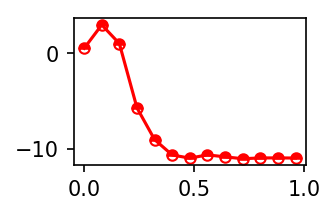

In [219]:

fig, ax = plt.subplots(figsize=(2, 1.3), dpi=150)
### middle affinity 25, halffilled symbol
extracted_hillN5_data_high_aff = extractData(hillN5_Etot25[0], etot=25, seg=False)
extracted_hillN5_seg_data_high_aff = extractData(hillN5_seg[0], etot=25, seg=True)
plt.plot(extracted_hillN5_data_high_aff["specificity"], np.asarray(extracted_hillN5_seg_data_high_aff["nag_tot"]) - np.asarray(extracted_hillN5_data_high_aff["nag_tot"]), '-or', fillstyle="top", ms=5)
#plt.plot(extracted_hillN5_seg_data_high_aff["specificity"], extracted_hillN5_seg_data_high_aff["nag_tot"], '--dr', fillstyle="top", ms=5)




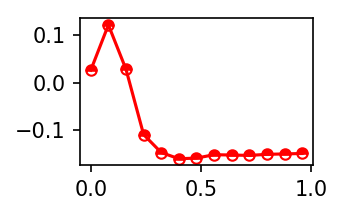

In [223]:

fig, ax = plt.subplots(figsize=(2, 1.3), dpi=150)
### middle affinity 25, halffilled symbol
extracted_hillN5_data_high_aff = extractData(hillN5_Etot25[0], etot=25, seg=False)
extracted_hillN5_seg_data_high_aff = extractData(hillN5_seg[0], etot=25, seg=True)

n1 = np.asarray(extracted_hillN5_seg_data_high_aff["nag_tot"])
n2 = np.asarray(extracted_hillN5_data_high_aff["nag_tot"])
plt.plot(extracted_hillN5_data_high_aff["specificity"],  (n1 - n2)/(n1 + n2) , '-or', fillstyle="top", ms=5)
#plt.plot(extracted_hillN5_seg_data_high_aff["specificity"], extracted_hillN5_seg_data_high_aff["nag_tot"], '--dr', fillstyle="top", ms=5)


